In [5]:
import pandas as pd
import numpy as np

from eda_class.data_inspection import DataInspector, SummaryStatisticsInspectionStrategy, DataTypesInspectionStrategy
from eda_class.missing_values_analysis import SimpleMissingValuesAnalysis
from eda_class.univariate_analysis import UnivariateAnalyzer, CategoricalUnivariateAnalysis, NumericalUnivariateAnalysis
from eda_class.bivariate_analysis import BivariateAnalyzer, CategoricalVsNumericalAnalysis, NumericalVsNumericalAnalysis
from eda_class.multivariate_analysis import SimpleMultivariateAnalysis
from eda_class.duplicate_analysis import DuplicateAnalyzer, SimpleDuplicateStrategy
from eda_class.text_cleaning import TextCleaner, StripUnitStrategy
from eda_class.feature_transform import FeatureEngineer, CarFeatureEngineeringStrategy


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [6]:
data_path = '../tmp/extracted_data/Car details v3.csv'
df = pd.read_csv(data_path)

In [7]:
# Step 1: Perform basic data inspection
# Initialize the DataInspector with a strategy that inspects data types and non-null counts.
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB
None


In [8]:
# Change the inspection strategy to summarize numerical and categorical data
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Summary Statistics (Categorical Features):
                          name    fuel seller_type transmission        owner  \
count                     8128    8128        8128         8128         8128   
unique                    2058       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       129    4402       

In [9]:
analyzer = DuplicateAnalyzer(strategy=SimpleDuplicateStrategy())
df = analyzer.analyze(df, drop_duplicates=True)


Found 1202 duplicate rows.
Sample duplicate rows:
                                         name  year  selling_price  km_driven  \
291                  Hyundai Grand i10 Sportz  2017         450000      35000   
296                          Maruti Swift VXI  2012         330000      50000   
370  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   
371                             Lexus ES 300h  2019        5150000      20000   
372            Jaguar XF 2.0 Diesel Portfolio  2017        3200000      45000   

       fuel seller_type transmission         owner     mileage   engine  \
291  Petrol  Individual       Manual   First Owner   18.9 kmpl  1197 CC   
296  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
370  Diesel      Dealer    Automatic   First Owner   13.6 kmpl  1999 CC   
371  Petrol      Dealer    Automatic   First Owner  22.37 kmpl  2487 CC   
372  Diesel      Dealer    Automatic   First Owner  19.33 kmpl  1999 CC   

      max_p


Missing Values Count by Column:
mileage      208
engine       208
max_power    205
seats        208
dtype: int64

Visualizing Missing Values...


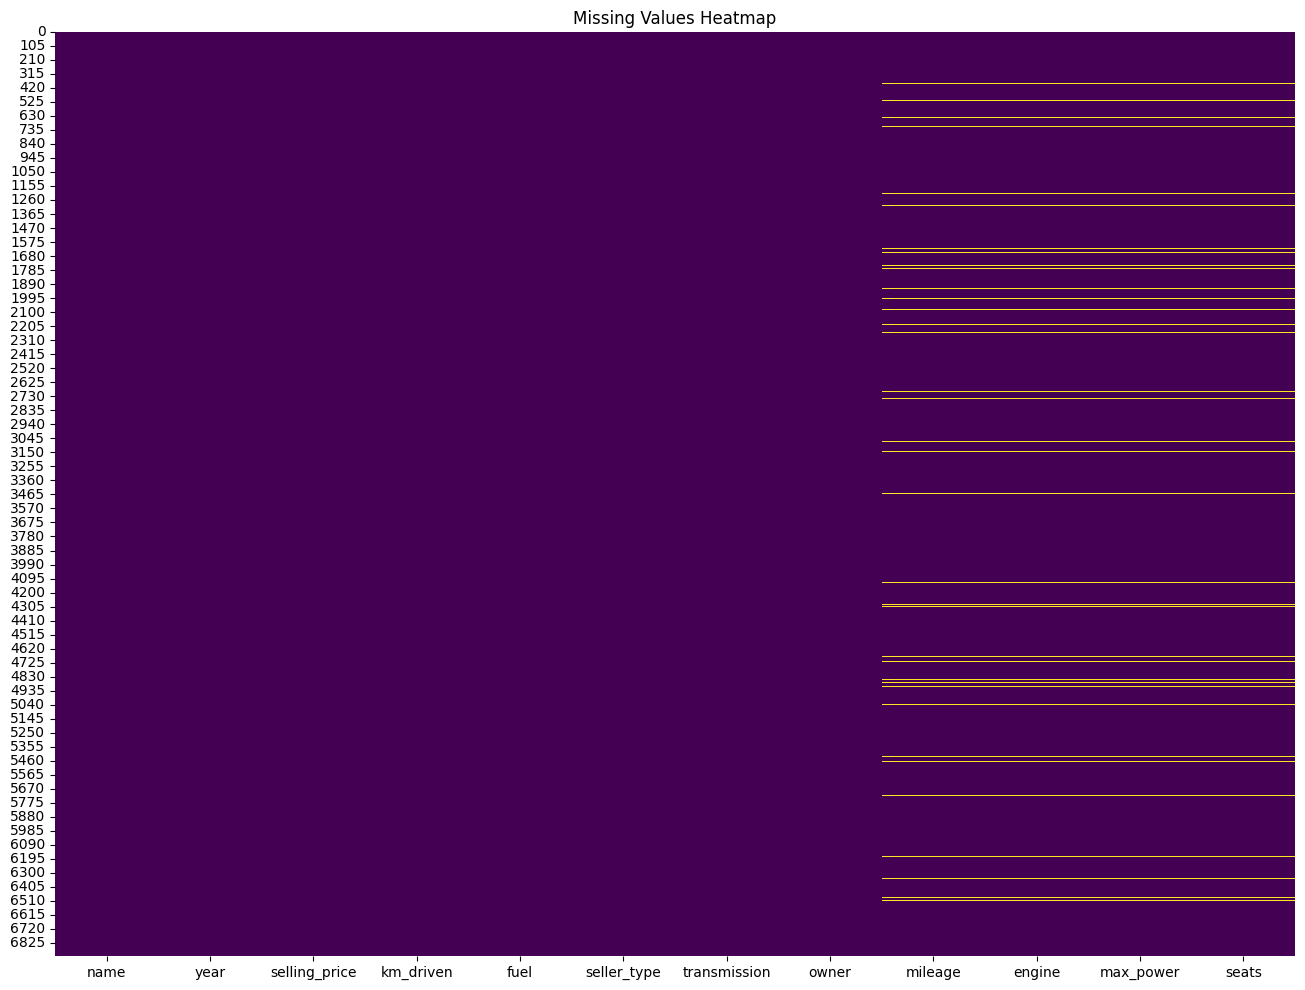

In [10]:
# Step 2: Analyze missing values
# Use the strategy to identify and summarize missing data in the dataset.
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

### Missing Values Heatmap – Key Insights

#### **1. Color Interpretation**
- **Yellow bands** in the heatmap represent missing values in the dataset.
- **Purple (dark background)** indicates valid, non-missing data.
- The intensity and spread of yellow highlight which features have missing entries.

#### **2. Columns with Missing Data**
- The following features contain a notable number of missing values:
  - `mileage` (208 missing entries)
  - `engine` (208 missing)
  - `max_power` (205 missing)
  - `seats` (208 missing)

These columns stand out in the heatmap, especially toward the right side, with thin yellow lines scattered throughout the rows.

#### **3. Distribution Patterns**
- Missing values are distributed across many different rows, without clustering in specific blocks.
- This pattern suggests a **random or semi-random distribution**, meaning that the missingness might not be caused by a single factor.
#### **4. Evaluating Impact**
- Features with more yellow are more severely affected and **may require special handling**.
  - Imputation (e.g., mean, median, most frequent)
  - Dropping the feature
  - Using advanced methods (e.g., model-based imputation)

Careful consideration is needed before deciding how to treat these features, especially if they are important for the predictive task.

# Insights

---

### **1. Data Types and Non-null Counts**
- The dataset contains **8128 entries** and **12 columns**.
- **Data Types**:
  - 1 columns with `float64`
  - 3 columns with `int64`
  - 8 columns with `object` (categorical)
- **Numerical Features**:
  - `year`
  - `selling_price`
  - `km_driven`
  - `seats` (float)

- **Categorical/Object Features**:
  - `name`
  - `fuel`
  - `seller_type`
  - `transmission`
  - `owner`
  - `mileage`
  - `engine`
  - `max_power`
---

### **2. Summary Statistics**

#### **Numerical Features**
- `selling_price` has a mean of approximately **638,271** with a high standard deviation (~806,254), indicating **wide price variability** among used cars.
- `year` ranges from **1983 to 2020**, with a mean of **2013.8**, suggesting most cars are relatively recent. This can be transform to `age` column.
- `km_driven` has values from **1 to over 2.3 million**, with a median of **60,000 km**, indicating significant variance in usage.
- `seats` mostly have a value of **5**, but the range spans from **2 to 14**, suggesting some data anomalies or inclusion of large vehicles.

#### **Categorical Features**
- `name`: Very high cardinality with **2058 unique values**, most common being `Maruti Swift Dzire VDI` (129 times).
- `fuel`: 4 categories, most common is `Diesel` with **4402 entries**.
- `seller_type`: Dominated by `Individual` sellers (**6766 records**).
- `transmission`: Two types, mostly `Manual` (**7078 records**).
- `owner`: 5 unique ownership levels, with `First Owner` being the most frequent (**5289 records**).
- Features like `mileage`, `engine`, and `max_power` are technically object types, but contain numeric values stored as strings. They will require cleaning and conversion for modeling.
  - `mileage` has 393 unique formats, most common is `18.9 kmpl`.
  - `engine`: 121 unique values, most frequent is `1248 CC`.
  - `max_power`: 322 unique values, most frequent is `74 bhp`.
- Some fetures like mileage, engine, max_power can be parsed to numerical feature

These statistics suggest that **feature engineering and preprocessing** (e.g., parsing numerical text fields and handling outliers) will be crucial before model training.

---
### **3. Duplicate Analysis**

- A total of **1202 duplicate rows** were found in the dataset.
- These rows are **exact copies across all columns**, indicating redundant entries that could negatively affect model training by introducing bias.
- Duplicate entries were **automatically removed**, reducing the dataset size and improving data quality.

#### **Action Taken**
- Duplicates were dropped using the `SimpleDuplicateStrategy`.
- The resulting cleaned dataset (`df_clean`) has **6926 unique rows**, down from the original 8128.
---

### **4. Missing Values Analysis**

#### **Features with Significant Missing Values**
The dataset contains missing values in the following key features (based on 6926 records):

- `mileage`: 208 missing values (**~3.0%**)
- `engine`: 208 missing values (**~3.0%**)
- `seats`: 208 missing values (**~3.0%**)
- `max_power`: 205 missing values (**~3.0%**)

These features are critical for vehicle performance assessment and pricing, and should be treated carefully in preprocessing.

#### **Observations**
- Decided to remove the rows with missing values since they only constitute about 3% of the data



In [11]:
df = TextCleaner(StripUnitStrategy(r'(kmpl|km/kg)')).clean(df, 'mileage')
df = TextCleaner(StripUnitStrategy(r'CC')).clean(df, 'engine')
df = TextCleaner(StripUnitStrategy(r'bhp')).clean(df, 'max_power')

engineer = FeatureEngineer(strategy=CarFeatureEngineeringStrategy(current_year=2021))
df = engineer.transform(df)

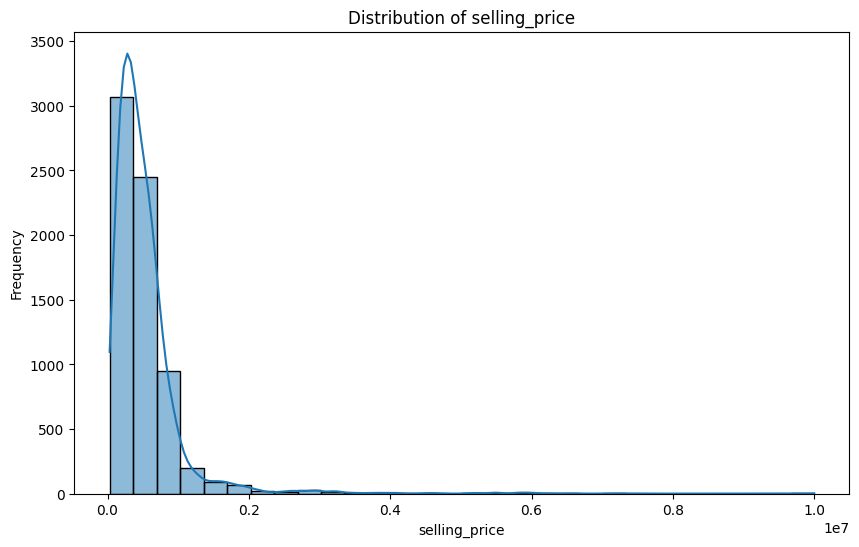

In [12]:
# Step 3: Univariate Analysis
# Perform analysis on a single numerical feature to understand its distribution.
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'selling_price')

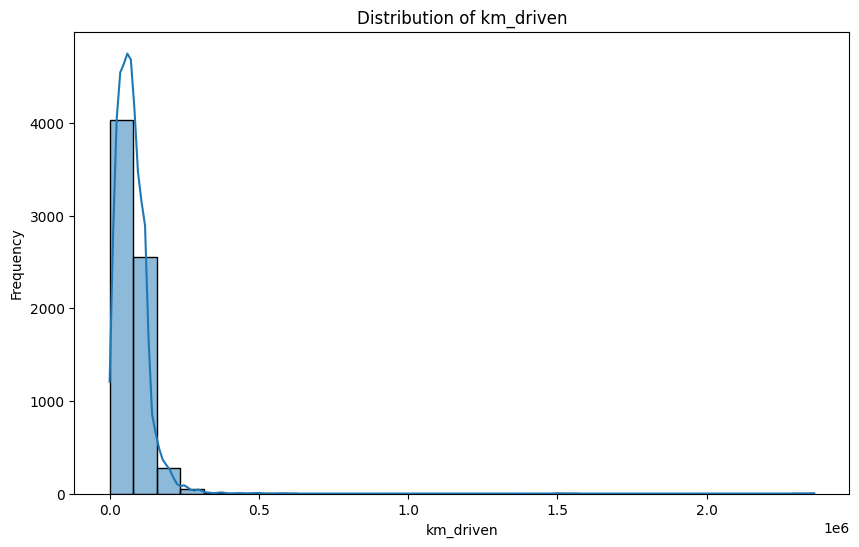

In [13]:
# Step 3: Univariate Analysis
# Perform analysis on a single numerical feature to understand its distribution.
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'km_driven')

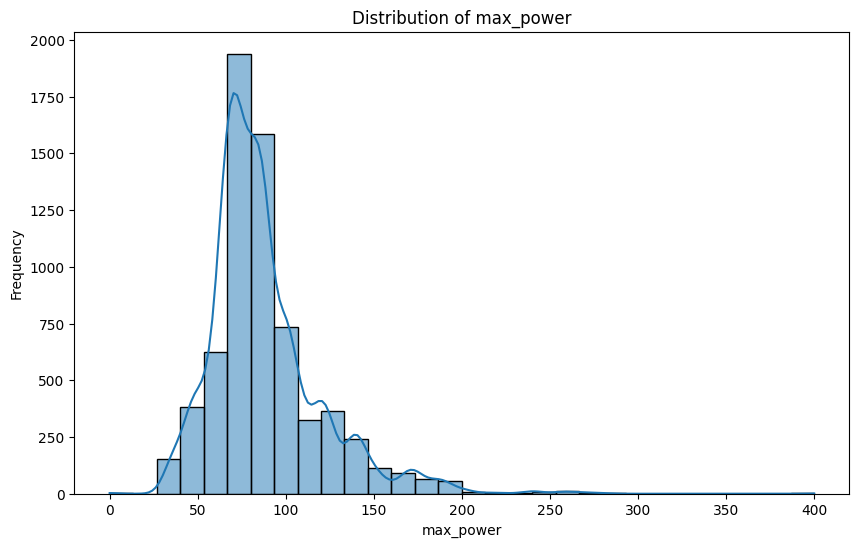

In [14]:
# Step 3: Univariate Analysis
# Perform analysis on a single numerical feature to understand its distribution.
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'max_power')

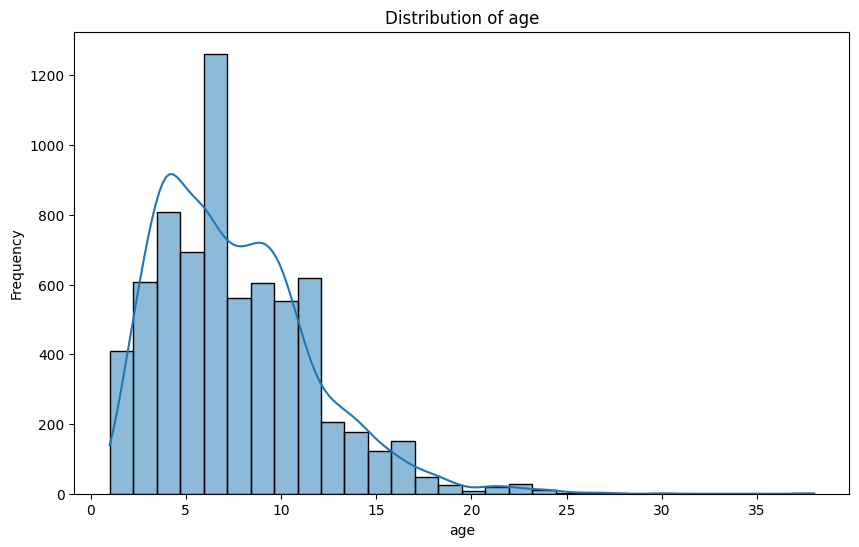

In [15]:
# Step 3: Univariate Analysis
# Perform analysis on a single numerical feature to understand its distribution.
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'age')

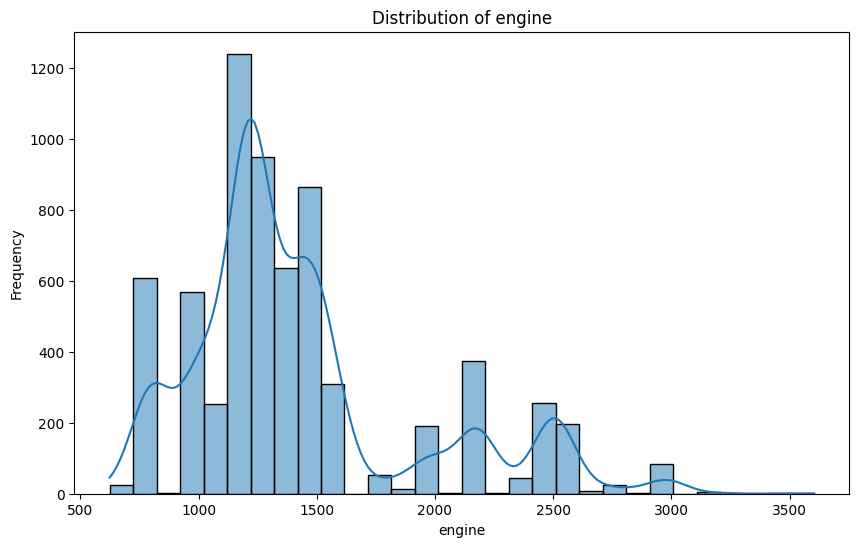

In [19]:
# Step 3: Univariate Analysis
# Perform analysis on a single numerical feature to understand its distribution.
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'engine')

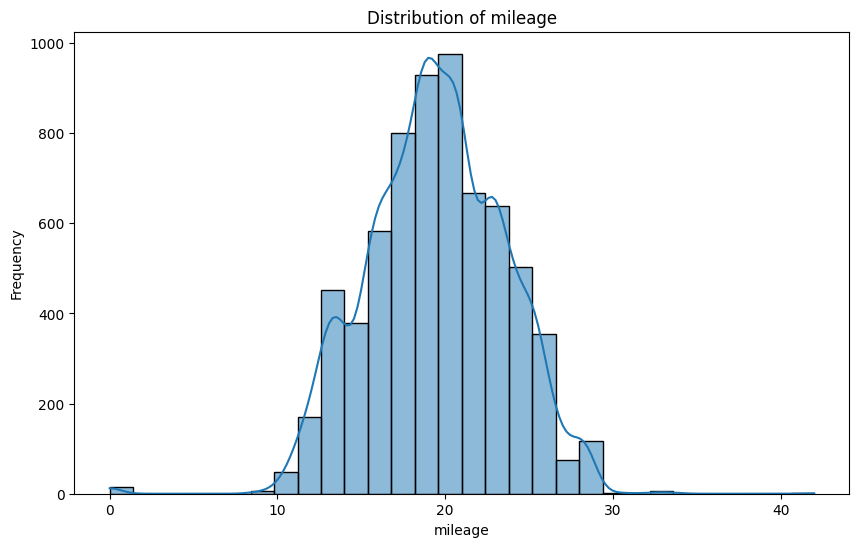

In [20]:
# Step 3: Univariate Analysis
# Perform analysis on a single numerical feature to understand its distribution.
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'mileage')

c:\Users\ADMIN\source\course\mlops_course\prices-predictor-system-mlflow-zenml\analysis\eda_class\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


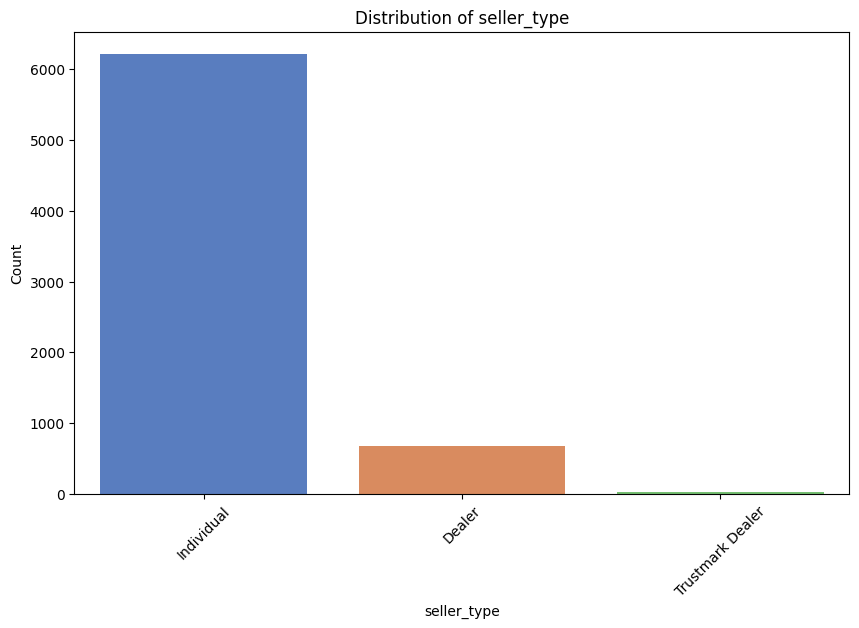

In [16]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'seller_type')


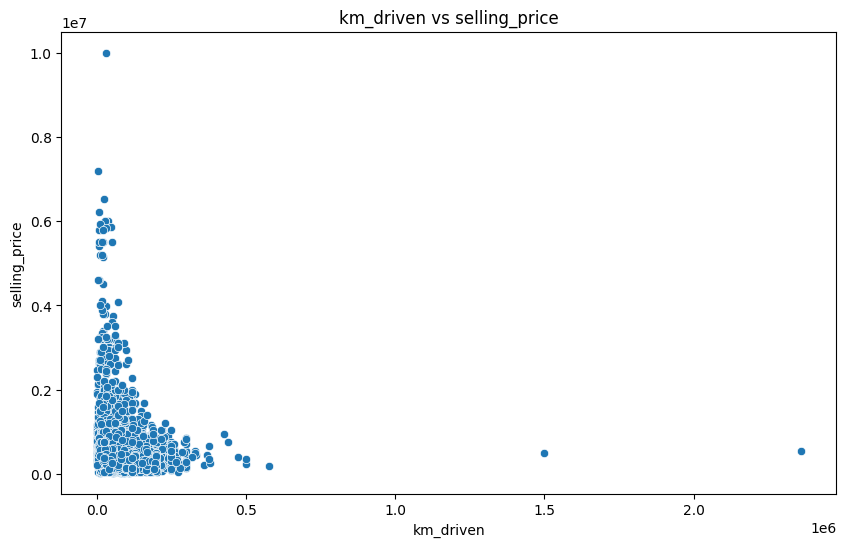

In [17]:
# Step 4: Bivariate Analysis
# Analyze the relationship between two numerical features to uncover potential correlations or patterns.
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'km_driven', 'selling_price')


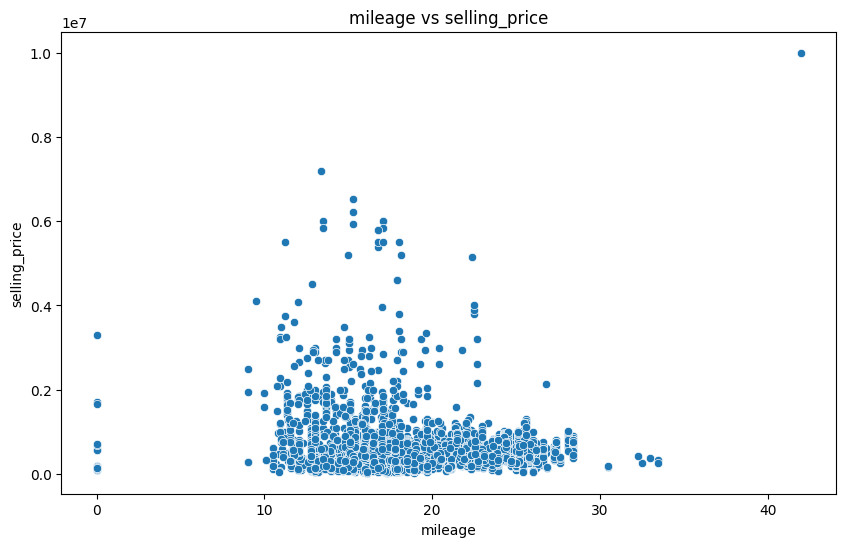

In [21]:
# Step 4: Bivariate Analysis
# Analyze the relationship between two numerical features to uncover potential correlations or patterns.
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'mileage', 'selling_price')


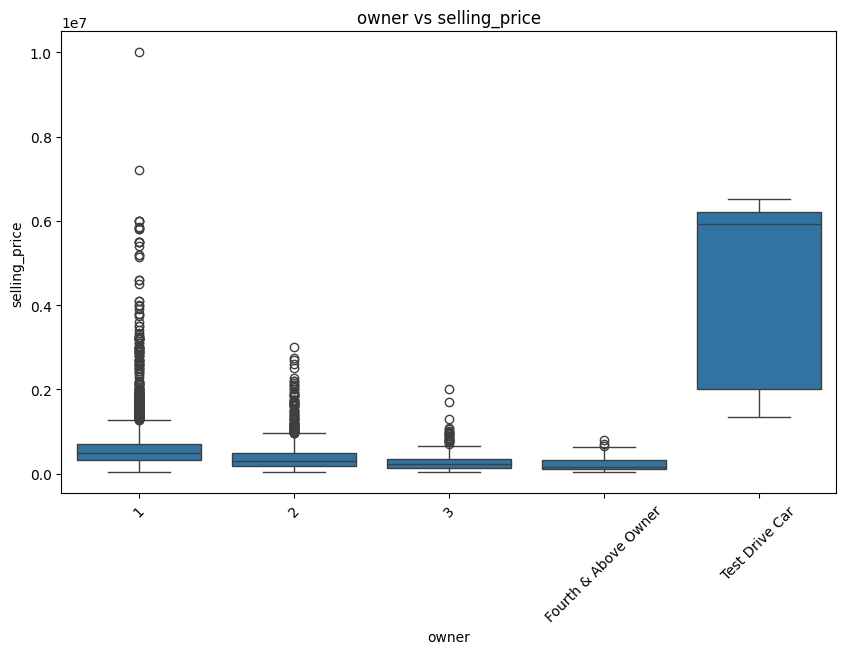

In [18]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'owner', 'selling_price')

### **Insights from Univariate and Bivariate Analysis**

---

#### **Step 3: Univariate Analysis**

1. **Seller Type Distribution (Categorical Feature)**  
   - **Insight**: The majority of sellers in the dataset are **Individuals**, with over 6000 listings. In contrast, **Dealers** account for a much smaller portion (around 700), and **Trustmark Dealers** are extremely rare.
   - **Implication**: The distribution is highly imbalanced. Modeling efforts may benefit from grouping or encoding these categories appropriately (e.g., binary flag for "is_individual" or combining rare categories). Additionally, model bias should be monitored to avoid overfitting to the dominant class (`Individual`).

2. **Numerical Feature Distributions (Summary from Histograms)**  
   - **Insight**: Features like `selling_price`, `km_driven`, `max_power`, and `age` show **positively-skewed distributions**, with a concentration of values on the lower end and long tails to the right.
   - **Mileage** appears to follow a **somewhat normal distribution**.
   - **Engine** does **not clearly follow a specific distribution** and may contain noise or formatting inconsistencies.
   - **Implication**: Skewed features may require **log transformation** to improve model performance and handle outliers more effectively. Features with unclear patterns like `engine` might need additional cleaning or reconsideration before modeling.

---
### **Step 4: Bivariate Analysis**

1. **Owner vs. Selling Price (Categorical vs. Numerical)**
   - **Insight**: Cars with fewer previous owners (1 or 2) generally have higher selling prices. As ownership count increases to 3 or 4+, the median price tends to drop. An exception is the `Test Drive Car` category, which has significantly higher median prices—likely because these are new or near-new vehicles.
   - **Implication**: Ownership history is a **strong signal** of car value. Including this variable can help capture depreciation patterns and consumer preferences. However, `Test Drive Car` might require separate handling due to its drastically different price scale.

2. **Mileage vs. Selling Price (Numerical vs. Numerical)**
   - **Insight**: The relationship between `mileage` and `selling_price` is somewhat **inverted-U shaped**: cars with extremely low or extremely high mileage have lower prices, while those with mid-range mileage (~15–20 kmpl) tend to be priced higher. A few outliers exist, but most cars cluster between 10–25 kmpl.
   - **Implication**: Mileage can be a **moderate predictor** of price, with mid-efficiency vehicles being more desirable. Outliers or incorrectly formatted mileage values (e.g., zeros or 40+) may require cleaning.

3. **Kilometers Driven vs. Selling Price (Numerical vs. Numerical)**
   - **Insight**: There is a clear **negative relationship** between `km_driven` and `selling_price`. Heavily driven cars (>100,000 km) tend to be priced lower, with the majority of listings concentrated below 200,000 km. A few extreme outliers (over 1 million km) likely reflect data entry errors.
   - **Implication**: This trend confirms that wear and tear (measured via km driven) plays a big role in resale value. Outliers should be reviewed, and a log transform might help reduce skewness for modeling.

### **Step 4: Bivariate Analysis**

1. **Owner vs. Selling Price (Categorical vs. Numerical)**
   - **Insight**: Cars with fewer previous owners (1 or 2) generally have higher selling prices. As ownership count increases to 3 or 4+, the median price tends to drop. An exception is the `Test Drive Car` category, which has significantly higher median prices—likely because these are new or near-new vehicles.
   - **Implication**: Ownership history is a **strong signal** of car value. Including this variable can help capture depreciation patterns and consumer preferences. However, `Test Drive Car` might require separate handling due to its drastically different price scale.

2. **Mileage vs. Selling Price (Numerical vs. Numerical)**
   - **Insight**: The relationship between `mileage` and `selling_price` is somewhat **inverted-U shaped**: cars with extremely low or extremely high mileage have lower prices, while those with mid-range mileage (~15–20 kmpl) tend to be priced higher. A few outliers exist, but most cars cluster between 10–25 kmpl.
   - **Implication**: Mileage can be a **moderate predictor** of price, with mid-efficiency vehicles being more desirable. Outliers or incorrectly formatted mileage values (e.g., zeros or 40+) may require cleaning.

3. **Kilometers Driven vs. Selling Price (Numerical vs. Numerical)**
   - **Insight**: There is a clear **negative relationship** between `km_driven` and `selling_price`. Heavily driven cars (>100,000 km) tend to be priced lower, with the majority of listings concentrated below 200,000 km. A few extreme outliers (over 1 million km) likely reflect data entry errors.
   - **Implication**: This trend confirms that wear and tear (measured via km driven) plays a big role in resale value. Outliers should be reviewed, and a log transform might help reduce skewness for modeling.


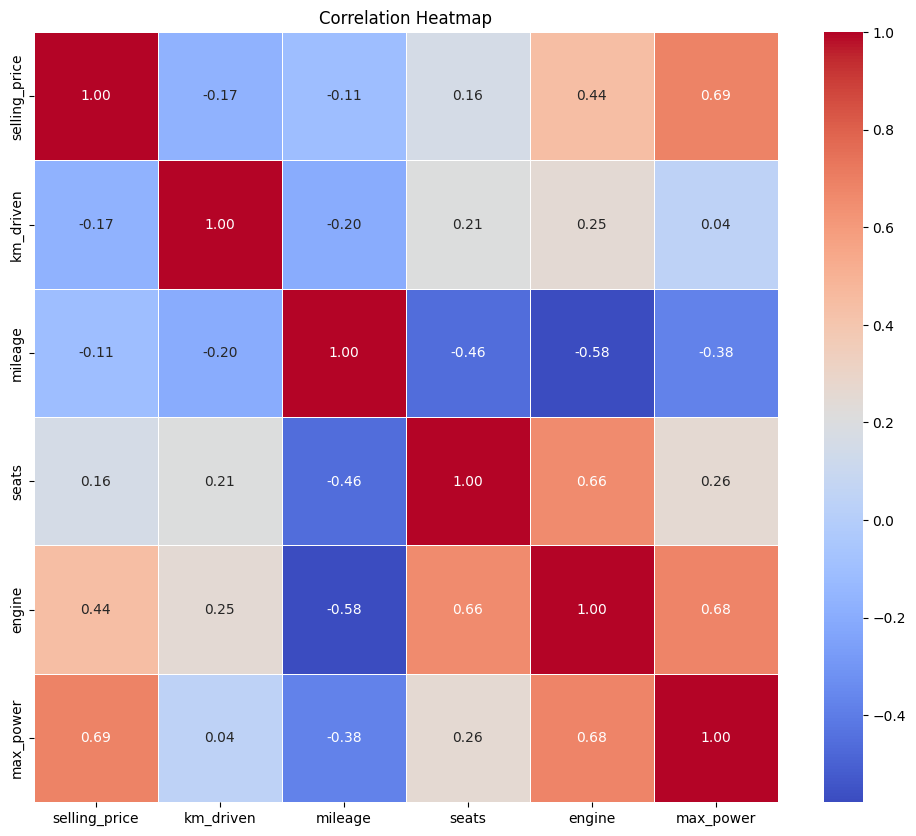

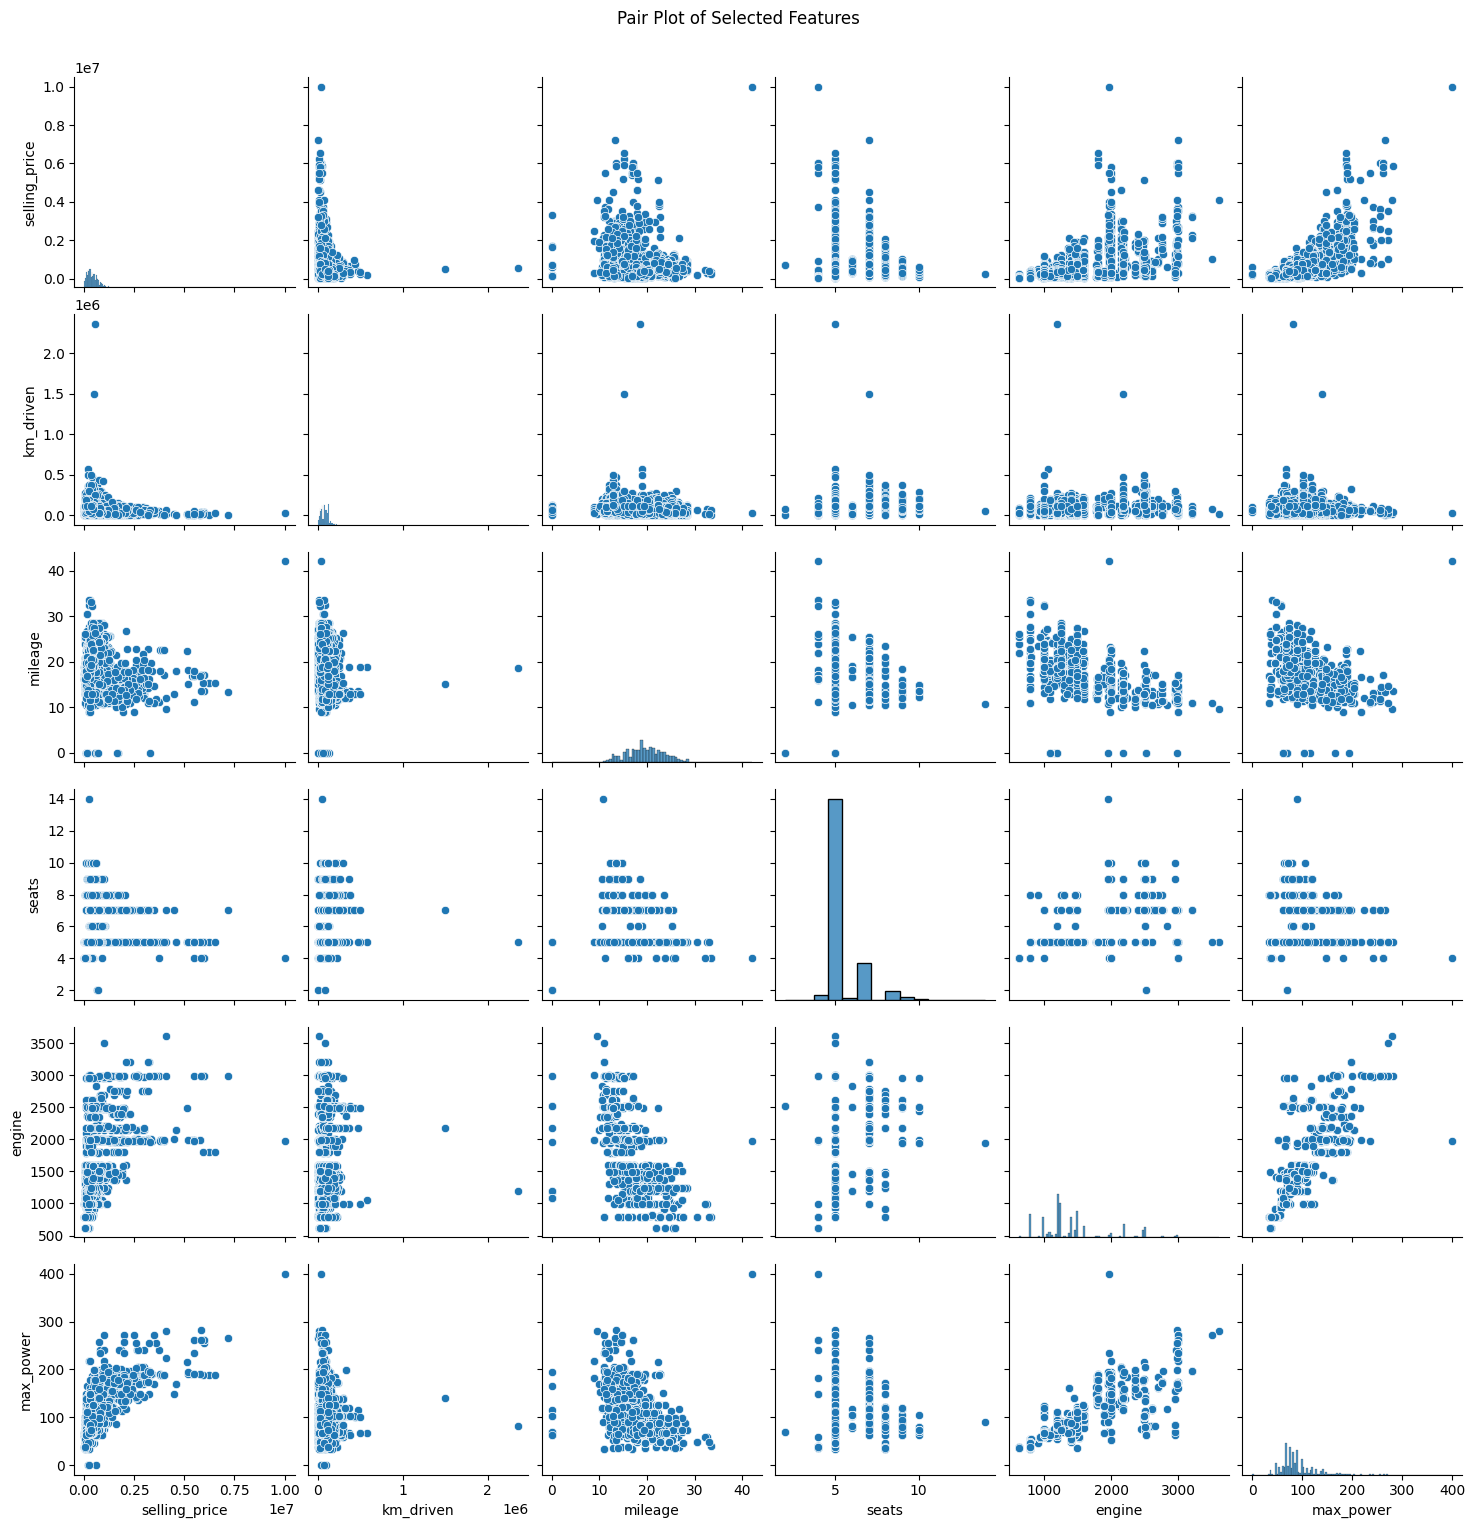

In [22]:
# Step 5: Multivariate Analysis
# Analyze relationships among multiple features simultaneously.

# Initialize the multivariate analyzer with a basic analysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select a subset of important numerical features for the analysis
selected_features = df[['selling_price', 'km_driven', 'mileage', 'seats', 'engine', 'max_power']]

# Perform the multivariate analysis on the selected features
multivariate_analyzer.analyze(selected_features)


### **Insights from Multivariate Analysis**

---

### **Correlation Heatmap**

1. **Selling Price and Max Power**
   - **Insight**: `max_power` has the strongest positive correlation with `selling_price` (**0.69**), followed by `engine` (**0.44**). This indicates that more powerful cars tend to sell at higher prices.
   - **Implication**: These features are key predictors and should be retained in modeling. They reflect vehicle performance, which directly influences value perception.

2. **Engine, Max Power, and Seats**
   - **Insight**: `engine` and `max_power` are highly correlated (**0.68**), and both also correlate well with `seats` (≈ **0.66**), suggesting larger, more powerful cars also tend to have more seating capacity.
   - **Implication**: While these relationships are expected, they may indicate **multicollinearity**, which should be evaluated during model building.

3. **Mileage vs. Engine and Max Power**
   - **Insight**: `mileage` is **negatively correlated** with both `engine` (**-0.58**) and `max_power` (**-0.38**). Larger engines tend to have lower fuel efficiency.
   - **Implication**: This inverse relationship is logical and useful for feature interaction terms or trade-off modeling (e.g., performance vs economy).

4. **Km Driven and Selling Price**
   - **Insight**: `km_driven` has a **negative correlation** with `selling_price` (**-0.17**), indicating that cars with higher mileage tend to have lower resale values.
   - **Implication**: While the correlation is modest, it's directionally expected and still valuable.

---

### **Pair Plot Insights**

1. **Strong Linear Trends**
   - **Insight**: The relationship between `max_power` and `selling_price` is clearly linear and upward trending. Similarly, `engine` follows the same trend.
   - **Implication**: These features are strong candidates for linear models or as part of interaction terms.

2. **Mileage Pattern**
   - **Insight**: `mileage` shows a weak and non-linear relationship with `selling_price`, confirming earlier correlation findings.
   - **Implication**: May require transformation or non-linear modeling techniques (e.g., decision trees, splines) to extract signal.

3. **Discrete Distribution of Seats**
   - **Insight**: `seats` behaves as a discrete variable with distinct levels, forming vertical bands in scatter plots.
   - **Implication**: Best treated as **categorical or ordinal** during encoding, not continuous.

---

### **Issues to Address**

1. **Multicollinearity**
   - **Issue**: High correlations between `engine`, `max_power`, and `seats` could cause instability in linear models.
   - **Action**: Check VIF values, consider regularization (Ridge/Lasso), or use dimensionality reduction (e.g., PCA) if necessary.

2. **Feature Engineering**
   - **Issue**: Some features like `mileage` and `km_driven` might benefit from log-scaling or binning to reduce skewness.
   - **Action**: Try log-transforming `km_driven`, and consider interactions like `engine_per_seat` or `power_per_km`.

3. **Outliers**
   - **Issue**: Outliers are visible in scatter plots, especially in `km_driven` (> 1 million km) and `selling_price` (> 10M).
   - **Action**: Use IQR or Z-score methods to identify and optionally remove outliers.


### **Feature Selection & Engineering Strategy**

Now, we look at each feature and decide which ones to include in model training. Choosing features that represent the data well is **crucial for building a model that generalizes effectively**.

Some features can be engineered (Feature Engineering) to better reflect the underlying patterns in the data and improve model performance. For example, the original `year` column indicates when a car was bought. If we subtract it from the current year (e.g., 2021), we get the **age of the car** — a more informative feature when evaluating used vehicles.

### **Feature-wise Decisions**

- **`name`**:
  - Extract brand information only.
  - Drop this column and create a new one: `brand`.

- **`selling_price`** (in Rupees):
  - Target variable is **positively skewed**.
  - Apply **log-transformation** to normalize distribution.
  - **Remove outliers** with `selling_price > 2.5M`.

- **`km_driven`**:
  - Feature contains **extreme outliers**.
  - Remove rows where `km_driven > 300,000`.

- **`fuel`**:
  - Drop `CNG` and `LPG` fuel types:
    - Their mileage is measured in `km/kg`, inconsistent with `kmpl` for petrol/diesel.
    - Very **small sample size**, not useful for training.

- **`mileage`**:
  - Contains invalid or noisy entries.
  - Remove rows where `mileage < 5` or `mileage > 35`.

- **`max_power`**:
  - Contains outliers (`max_power > 300 bhp`).
  - Remove extreme values and apply **log-transformation**.

- **`age`**:
  - Derived from `year`.
  - Positively skewed → apply **log-transformation** to improve performance in linear models.

---

### **Summary**

We apply:
- **Outlier removal** on key numerical features (`selling_price`, `km_driven`, `mileage`, `max_power`)
- **Log transformation** on positively skewed variables
- **Feature extraction** from `name` and `year`
- **Filtering out inconsistent categories** (like rare fuel types)

These transformations help improve model accuracy, interpretability, and reduce noise in the training data.